<a href="https://colab.research.google.com/github/Vishalgupta0809/CodeClause_Stock-Market-Prediction/blob/main/stock_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv("/content/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-18,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-18,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-18,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-18,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-18,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [10]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,262.000000,267.899994,250.029999,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,16906900


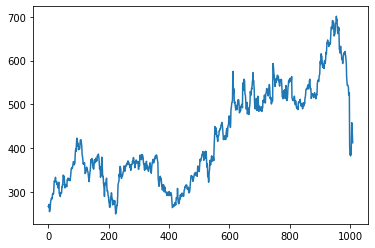

In [20]:
plt.plot(df.High)

In [21]:
mavg100=df.High.rolling(100).mean()
mavg100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1004    609.602599
1005    608.092999
1006    606.518299
1007    604.825199
1008    603.080099
Name: High, Length: 1009, dtype: float64

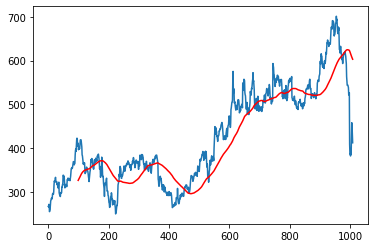

In [22]:
#plt.figure(figsize=(12,16))
plt.plot(df.High)
plt.plot(mavg100, 'red')

In [23]:
mavg200=df.High.rolling(200).mean()
mavg200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1004    567.084399
1005    566.594599
1006    566.036699
1007    565.605699
1008    565.099749
Name: High, Length: 1009, dtype: float64

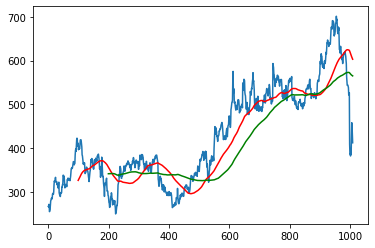

In [24]:
plt.plot(df.High)
plt.plot(mavg100, 'red')
plt.plot(mavg200, 'green')

In [27]:
train=pd.DataFrame(df['High'][0:int(len(df)*0.70)])
test=pd.DataFrame(df['High'][int(len(df)*0.70):int(len(df))])
print(train.shape)
print(test.shape)

(706, 1)
(303, 1)


In [29]:
train.head()

,High
0,267.899994
1,266.700012
2,272.450012
3,267.619995
4,255.800003


In [32]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler(feature_range=(0,1))

In [33]:
train_array=scal.fit_transform(train)
train_array

array([[0.05312269],
       [0.04942725],
       [0.06713482],
       [0.05226041],
       [0.01585985],
       [0.0261764 ],
       [0.03313627],
       [0.05922028],
       [0.09192537],
       [0.09642152],
       [0.10827791],
       [0.11083401],
       [0.10424367],
       [0.10886304],
       [0.13858093],
       [0.14384698],
       [0.13888891],
       [0.13734912],
       [0.15561098],
       [0.20405275],
       [0.2313994 ],
       [0.22508622],
       [0.22256103],
       [0.24879899],
       [0.25662114],
       [0.23155334],
       [0.2255174 ],
       [0.22403917],
       [0.22622564],
       [0.2043299 ],
       [0.21202884],
       [0.21172087],
       [0.19546071],
       [0.18083272],
       [0.21674059],
       [0.22249938],
       [0.14828158],
       [0.13765709],
       [0.13001971],
       [0.12503081],
       [0.12213601],
       [0.14939027],
       [0.14843561],
       [0.15059126],
       [0.14874359],
       [0.18782342],
       [0.1862528 ],
       [0.205

In [36]:
x_train=[]
y_train=[]
for i in range(100, train_array.shape[0]):
  x_train.append(train_array[i-100:i])
  y_train.append(train_array[i, 0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [41]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [46]:
model=Sequential()
model.add(LSTM(units=50,activation='relu', return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=70,activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=90,activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units=1))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 70)           36680     
                                                                 
 dropout_2 (Dropout)         (None, 100, 70)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 90)          

In [49]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
19/19 [==============================] - 12s 295ms/step - loss: 0.0918
Epoch 2/50
19/19 [==============================] - 6s 306ms/step - loss: 0.0379
Epoch 3/50
19/19 [==============================] - 5s 288ms/step - loss: 0.0211
Epoch 4/50
19/19 [==============================] - 5s 285ms/step - loss: 0.0185
Epoch 5/50
19/19 [==============================] - 6s 296ms/step - loss: 0.0163
Epoch 6/50
19/19 [==============================] - 6s 290ms/step - loss: 0.0161
Epoch 7/50
19/19 [==============================] - 6s 295ms/step - loss: 0.0152
Epoch 8/50
19/19 [==============================] - 6s 324ms/step - loss: 0.0146
Epoch 9/50
19/19 [==============================] - 5s 288ms/step - loss: 0.0147
Epoch 10/50
19/19 [==============================] - 5s 288ms/step - loss: 0.0141
Epoch 11/50
19/19 [==============================] - 6s 324ms/step - loss: 0.0136
Epoch 12/50
19/19 [==============================] - 8s 426ms/step - loss: 0.0136
Epoch 13/50
19/19 [=====

In [50]:
model.save('keras_model.h5')

In [51]:
test.head()

,High
706,491.149994
707,484.049988
708,486.899994
709,493.250000
710,492.549988


In [52]:
train.tail(100)

,High
606,492.279999
607,499.500000
608,504.820007
609,505.100006
610,510.000000
...,...
701,485.579987
702,487.510010
703,488.609985
704,487.799988


In [53]:
past_100=train.tail(100)

In [54]:
f_df=past_100.append(train,ignore_index=True)

In [55]:
f_df.head()

,High
0,492.279999
1,499.500000
2,504.820007
3,505.100006
4,510.000000


In [57]:
input_data=scal.fit_transform(f_df)
input_data


array([[0.74411802],
       [0.76635257],
       [0.78273593],
       [0.78359821],
       [0.79868812],
       [0.93997909],
       [1.        ],
       [0.84642155],
       [0.85720007],
       [0.87734043],
       [0.77894802],
       [0.78175045],
       [0.78704732],
       [0.75926958],
       [0.74294777],
       [0.72838143],
       [0.7584073 ],
       [0.76108652],
       [0.75224815],
       [0.73201531],
       [0.75187852],
       [0.77740823],
       [0.80004314],
       [0.79899609],
       [0.80121339],
       [0.79342207],
       [0.7600702 ],
       [0.70913408],
       [0.71396894],
       [0.72000498],
       [0.73195366],
       [0.72551735],
       [0.75341831],
       [0.75095468],
       [0.76462801],
       [0.76213356],
       [0.77097193],
       [0.74470315],
       [0.91891471],
       [0.89415498],
       [0.88799583],
       [0.86640797],
       [0.94462928],
       [0.94188841],
       [0.93418947],
       [0.85214951],
       [0.83564303],
       [0.829

In [59]:
input_data.shape

(806, 1)

In [60]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
  

In [61]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(706, 100, 1)
(706,)


In [63]:
#prediction
y_predicted=model.predict(x_test)

23/23 [==============================] - 2s 80ms/step


In [64]:
y_predicted.shape

(706, 1)

In [69]:
y_predicted

array([[0.7495199 ],
       [0.7439305 ],
       [0.73096764],
       [0.7092994 ],
       [0.6799943 ],
       [0.6449389 ],
       [0.60617065],
       [0.5657069 ],
       [0.5253403 ],
       [0.48624086],
       [0.44873846],
       [0.41294068],
       [0.3790313 ],
       [0.34722424],
       [0.31746542],
       [0.29003328],
       [0.26542643],
       [0.24363665],
       [0.22450897],
       [0.20784247],
       [0.19345711],
       [0.18126291],
       [0.17105661],
       [0.16261111],
       [0.15578496],
       [0.1504319 ],
       [0.1463562 ],
       [0.14344595],
       [0.14182831],
       [0.14227381],
       [0.14545888],
       [0.15214866],
       [0.16177672],
       [0.17292678],
       [0.18407516],
       [0.19419329],
       [0.202778  ],
       [0.2093007 ],
       [0.21314916],
       [0.21392602],
       [0.2114871 ],
       [0.2062431 ],
       [0.19898787],
       [0.19082318],
       [0.18249029],
       [0.17452936],
       [0.16723698],
       [0.160

In [68]:
y_test


array([0.05312269, 0.04942725, 0.06713482, 0.05226041, 0.01585985,
       0.0261764 , 0.03313627, 0.05922028, 0.09192537, 0.09642152,
       0.10827791, 0.11083401, 0.10424367, 0.10886304, 0.13858093,
       0.14384698, 0.13888891, 0.13734912, 0.15561098, 0.20405275,
       0.2313994 , 0.22508622, 0.22256103, 0.24879899, 0.25662114,
       0.23155334, 0.2255174 , 0.22403917, 0.22622564, 0.2043299 ,
       0.21202884, 0.21172087, 0.19546071, 0.18083272, 0.21674059,
       0.22249938, 0.14828158, 0.13765709, 0.13001971, 0.12503081,
       0.12213601, 0.14939027, 0.14843561, 0.15059126, 0.14874359,
       0.18782342, 0.1862528 , 0.20583886, 0.2015583 , 0.27091032,
       0.27152628, 0.26071694, 0.26441247, 0.24812148, 0.21433852,
       0.18271131, 0.20319047, 0.20571575, 0.20703994, 0.19348983,
       0.20463788, 0.19074896, 0.21658665, 0.24134637, 0.23620353,
       0.2503696 , 0.25070831, 0.24824469, 0.24590418, 0.2349409 ,
       0.24350211, 0.24575024, 0.23333955, 0.25015401, 0.26478

In [73]:
scal.scale_

array([0.00307958])

In [74]:
scal_factor=1/0.00307958
y_predicted=y_predicted*scal_factor
y_test=y_test*scal_factor

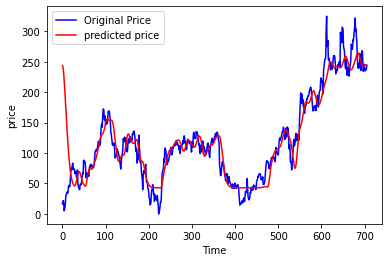

In [80]:
plt.plot(y_test, 'blue', label='Original Price')
plt.plot(y_predicted,'red',label='predicted price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')